# TS2:sistemas Lineales e Invariantes en el Tiempo
### Francisco Mato
## Introduccion
las ecuaciones en dferencias en coontraparte con las ecuaciones diferenciales estas son a tiempo discreto N con coeficientes constantes, sus soluciones se pueden escribir como la suma de una solucion homogenea mas una particular.para resolver estas ecuaciones es importante tener en cuenta las condicones auxiliares las cuales son que x[n]=0 para n menores a un n_0 y los mismo para y[n], esto hace que el sistema sea causal y linealmente independiente en el tiempo quedandonos que 
\begin{equation}
y[n]=\frac{1}{a_0}[\sum_{k=0}^{M}b_k*x[n-k]-\sum_{k=1}^{N}a_k*y[n-k]]
\end{equation}
por ello es importante la condicones auxiliares, debido a que el argumento de y puede ser y[n-1], y[n-2], y[n-N]. las ecuaciones en diferencia pueden ser recursivas o no recurvsivas, son recursivas cuando para determinar la salida en terminos de la entrada y de las salidas previas. es no recursiva cuando los valores de la salida previamente calculada no determina valores siguietes de la salida, para este tipo no son nesesarios condiciones auxiliares.
generalmente se les puede representar como un sistema linealmente invariente en el tiempo (LTI) donde la h es la respuesta al impulso, la cual se calcula a partir de utilizar como entrada en la ecuacion en diferencias, la funcion delta(que vale 1 en 0 y 0 para cualuier n).

# analisis y discucion

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
from scipy import signal as sp
def funcion_sen(ff,nn,vmax=1,dc=0,ph=0,fs=2):
    
    t=np.arange(0,(nn)/fs,1/fs)
   
    y=vmax*np.sin(ff*2*np.pi*t+ph)+dc
    
    return t,y 

In [26]:
N=100
#--------------------------------------------------------------
respuesta_impulso=np.zeros(N)
respuesta_impulso
x=np.zeros(N)
x[0]=1
for n in np.arange(N):
    respuesta_impulso[n]=3*(10**-2)*x[n]+5*(10**-2)*x[n-1]+3*(10**-2)*x[n-2]+1.5*respuesta_impulso[n-1]-0.5*respuesta_impulso[n-2]

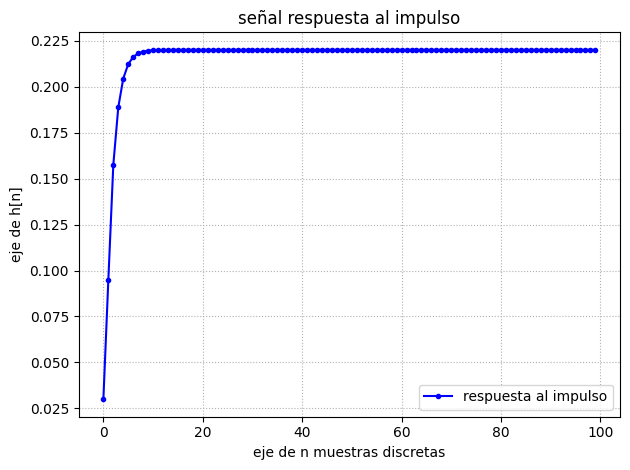

In [27]:
plt.plot(np.arange(N),respuesta_impulso, label="respuesta al impulso",linestyle='-',marker='.' ,color='b')
plt.legend()
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n]')
plt.title("señal respuesta al impulso")
plt.draw()
plt.tight_layout() 

plt.show()

la respuesta al impulso obteniada a traves de la ecuacion en diferencias podemos asemejarla que a tiempos(o en nuestro caso muestras) infinito la señal se comportaria como la señal escalon unitario u(t) la cual se decribe por
\begin{equation}
u(x)= \left\{ \begin{array}{lcc} 0 & si & t< 0 \\ \\ 1 & si & t \geq 0  \end{array} \right.
\end{equation}
multiplicado por un coeficiente C el cual es aproximadamente 0.22 por lo tanto nuestra u(t) a tiempo infinito seria:
\begin{equation}
u(x)= \left\{ \begin{array}{lcc} 0 & si & t< 0 \\ \\ 0.22 & si & t \geq 0  \end{array} \right.
\end{equation}


Muestras 100 frecuencia de muestro 66666.67 potencia de la señal 1.86


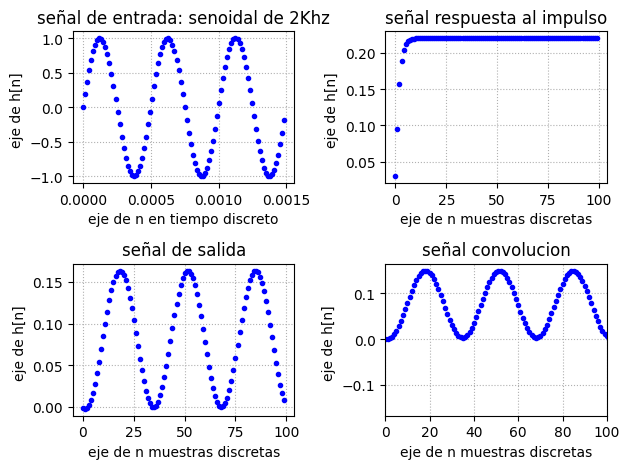

In [28]:
f=2000
N=100
numero_periodos=3
fs=N*f/numero_periodos

h=np.zeros(N)


t , x = funcion_sen(ff=2000,nn=N,fs=fs)


for n in np.arange(N):
    h[n]=3*(10**-2)*x[n]+5*(10**-2)*x[n-1]+3*(10**-2)*x[n-2]+1.5*h[n-1]-0.5*h[n-2]

energia=np.sum(h**2)/N
plt.subplot(2,2,1)
plt.plot(np.arange(N)/fs,x,linestyle='',marker='.' ,color='b')
plt.title("señal de entrada: senoidal de 2Khz")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n en tiempo discreto')
plt.ylabel('eje de h[n] ')
plt.subplot(2,2,2)
plt.plot(np.arange(N),respuesta_impulso,linestyle='',marker='.' ,color='b')
plt.title("señal respuesta al impulso")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.subplot(2,2,3)
plt.plot(np.arange(N),h/np.sqrt(np.sum(np.abs(h**2))),linestyle='',marker='.' ,color='b')
plt.title("señal de salida")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')

plt.subplot(2,2,4)
plt.plot(np.arange(2*N-1),np.convolve(respuesta_impulso,x,mode="full")/np.sqrt(np.sum(np.abs(np.convolve(respuesta_impulso,x,mode="full")))),linestyle='',marker='.' ,color='b')
plt.title("señal convolucion")
plt.xlim(0,N)
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.tight_layout() 
print("Muestras",N,"frecuencia de muestro",round(fs,2),"potencia de la señal",round(energia,2))

como sabemos, al insertar una señal de entrada a la ecuacion de diferencias, obtemos la convolucion entre la señal de entrada y la respuesta al impulso.entonces el resultado obtenido podemos asemejarlo a la funcion
\begin{equation}
h(x)=1-cos(wx)
\end{equation}
en el caso de la las señales convolucionadas no se grafico a partir 100 ya que se hacia todo 0

Muestras 100 frecuencia de muestro 66666.67 potencia de la señal 0.73


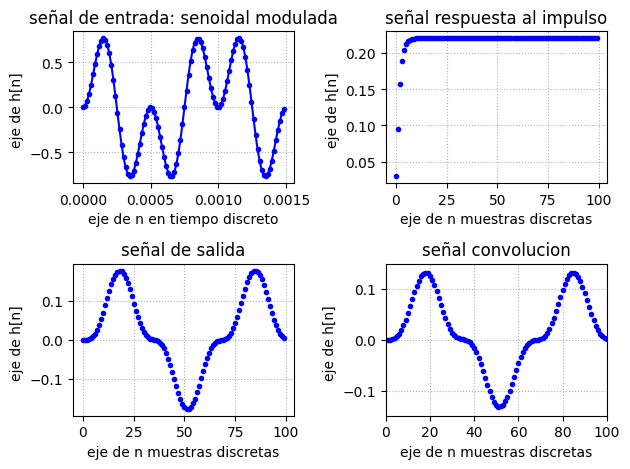

In [29]:
f=2000
N=100
numero_periodos=3
fs=N*f/numero_periodos

h=np.zeros(N)
t=np.arange(0,(N)/fs,1/fs)

x = np.sin(f*2*np.pi*t)*np.sin((f/2)*2*np.pi*t)


for n in np.arange(N):
    h[n]=3*(10**-2)*x[n]+5*(10**-2)*x[n-1]+3*(10**-2)*x[n-2]+1.5*h[n-1]-0.5*h[n-2]

energia=np.sum(h**2)/N 
plt.subplot(2,2,1)
plt.plot(np.arange(N)/fs,x,linestyle='-',marker='.' ,color='b')
plt.title("señal de entrada: senoidal modulada")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n en tiempo discreto')
plt.ylabel('eje de h[n] ')
plt.subplot(2,2,2)
plt.plot(np.arange(N),respuesta_impulso,linestyle='',marker='.' ,color='b')
plt.title("señal respuesta al impulso")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.subplot(2,2,3)
plt.plot(np.arange(N),h/np.sqrt(np.sum(np.abs(h**2))),linestyle='',marker='.' ,color='b')
plt.title("señal de salida")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')

plt.subplot(2,2,4)
plt.plot(np.arange(2*N-1),np.convolve(respuesta_impulso,x,mode="full")/np.sqrt(np.sum(np.abs(np.convolve(respuesta_impulso,x,mode="full")))),linestyle='',marker='.' ,color='b')
plt.title("señal convolucion")
plt.xlim(0,N)
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.tight_layout() 
print("Muestras",N,"frecuencia de muestro",round(fs,2),"potencia de la señal",round(energia,2))

Muestras 100 frecuencia de muestro 66666.67 potencia de la señal 0.44


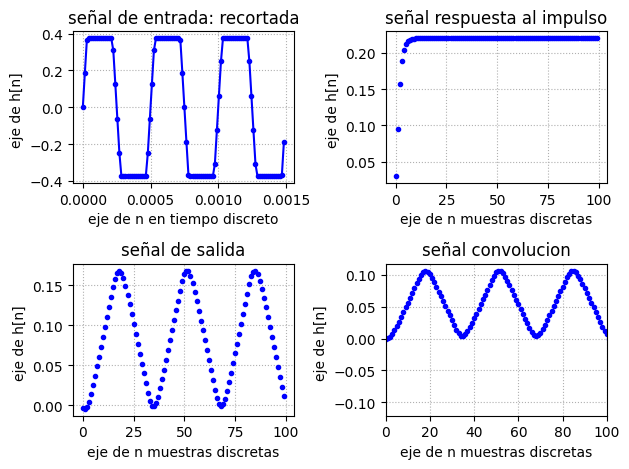

In [30]:
f=2000
N=100
numero_periodos=3
fs=N*f/numero_periodos

h=np.zeros(N)

t , seno = funcion_sen(ff=2000,nn=N,fs=fs)
potencia=(1/(N))*np.sum(np.abs(seno)**2)
x = np.clip(seno,-potencia*0.75,potencia*0.75)


for n in np.arange(N):
    h[n]=3*(10**-2)*x[n]+5*(10**-2)*x[n-1]+3*(10**-2)*x[n-2]+1.5*h[n-1]-0.5*h[n-2]

energia=np.sum(h**2)/N 
plt.subplot(2,2,1)
plt.plot(np.arange(N)/fs,x,linestyle='-',marker='.' ,color='b')
plt.title("señal de entrada: recortada")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n en tiempo discreto')
plt.ylabel('eje de h[n] ')
plt.subplot(2,2,2)
plt.plot(np.arange(N),respuesta_impulso,linestyle='',marker='.' ,color='b')
plt.title("señal respuesta al impulso")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.subplot(2,2,3)
plt.plot(np.arange(N),h/np.sqrt(np.sum(np.abs(h**2))),linestyle='',marker='.' ,color='b')
plt.title("señal de salida")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')

plt.subplot(2,2,4)
plt.plot(np.arange(2*N-1),np.convolve(respuesta_impulso,x,mode="full")/np.sqrt(np.sum(np.abs(np.convolve(respuesta_impulso,x,mode="full")))),linestyle='',marker='.' ,color='b')
plt.title("señal convolucion")
plt.xlim(0,N)
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.tight_layout() 
print("Muestras",N,"frecuencia de muestro",round(fs,2),"potencia de la señal",round(energia,2))

Muestras 100 frecuencia de muestro 66666.67 potencia de la señal 6.0


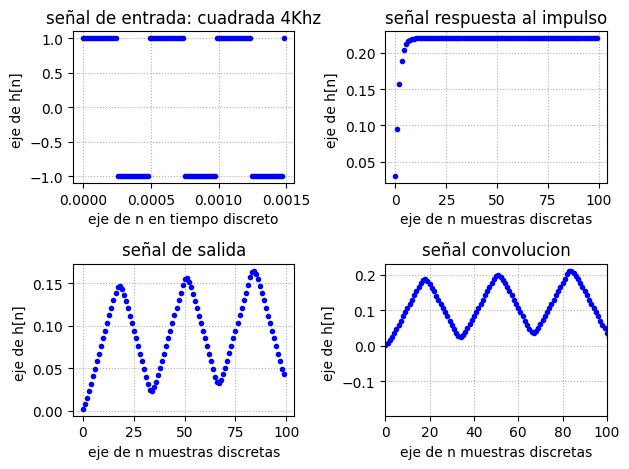

In [31]:
N=100
ff=4000
numero_periodos=3
fs=N*f/numero_periodos
t=np.linspace(0,3/ff,N)
x=sp.square(2 * np.pi * ff * t)

h=np.zeros(N)
for n in np.arange(N):
    h[n]=3*(10**-2)*x[n]+5*(10**-2)*x[n-1]+3*(10**-2)*x[n-2]+1.5*h[n-1]-0.5*h[n-2]

energia=np.sum(h**2)/N

plt.subplot(2,2,1)
plt.plot(np.arange(N)/fs,x,linestyle='',marker='.' ,color='b')
plt.title("señal de entrada: cuadrada 4Khz")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n en tiempo discreto')
plt.ylabel('eje de h[n] ')
plt.subplot(2,2,2)
plt.plot(np.arange(N),respuesta_impulso,linestyle='',marker='.' ,color='b')
plt.title("señal respuesta al impulso")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.subplot(2,2,3)
plt.plot(np.arange(N),h/np.sqrt(np.sum(np.abs(h**2))),linestyle='',marker='.' ,color='b')
plt.title("señal de salida")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')

plt.subplot(2,2,4)
plt.plot(np.arange(2*N-1),np.convolve(respuesta_impulso,x,mode="full")/np.sqrt(np.sum(np.abs(np.convolve(respuesta_impulso,x,mode="full")))),linestyle='',marker='.' ,color='b')
plt.title("señal convolucion")
plt.xlim(0,N)
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')

plt.tight_layout() 
print("Muestras",N,"frecuencia de muestro",round(fs,2),"potencia de la señal",round(energia,2))

Muestras 100 frecuencia de muestro 66666.67 potencia de la señal 1.8


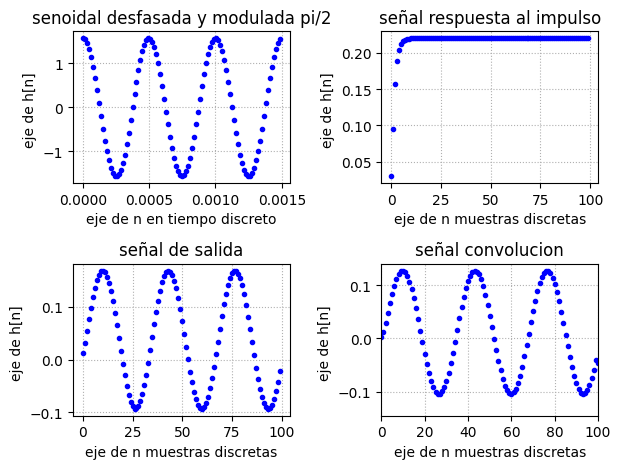

In [32]:
f=2000
N=100
fs=N
numero_periodos=3
fs=N*f/numero_periodos
t,x=funcion_sen(ff=f,nn=N,fs=fs,vmax=np.pi/2,ph=np.pi/2)
h=np.zeros(N)

for n in np.arange(N):
    h[n]=3*(10**-2)*x[n]+5*(10**-2)*x[n-1]+3*(10**-2)*x[n-2]+1.5*h[n-1]-0.5*h[n-2]
    
energia=np.sum(h**2)/N
plt.subplot(2,2,1)
plt.plot(np.arange(N)/fs,x,linestyle='',marker='.' ,color='b')
plt.title("senoidal desfasada y modulada pi/2")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n en tiempo discreto')
plt.ylabel('eje de h[n] ')
plt.subplot(2,2,2)
plt.plot(np.arange(N),respuesta_impulso,linestyle='',marker='.' ,color='b')
plt.title("señal respuesta al impulso")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.subplot(2,2,3)
plt.plot(np.arange(N),h/np.sqrt(np.sum(np.abs(h**2))),linestyle='',marker='.' ,color='b')
plt.title("señal de salida")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')

plt.subplot(2,2,4)
plt.plot(np.arange(2*N-1),np.convolve(respuesta_impulso,x,mode="full")/np.sqrt(np.sum(np.abs(np.convolve(respuesta_impulso,x,mode="full")))),linestyle='',marker='.' ,color='b')
plt.title("señal convolucion")
plt.xlim(0,N)
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')

plt.tight_layout() 
print("Muestras",N,"frecuencia de muestro",round(fs,2),"potencia de la señal",round(energia,2))

Muestras 100 frecuencia de muestro 10.0 potencia de la señal 4.43


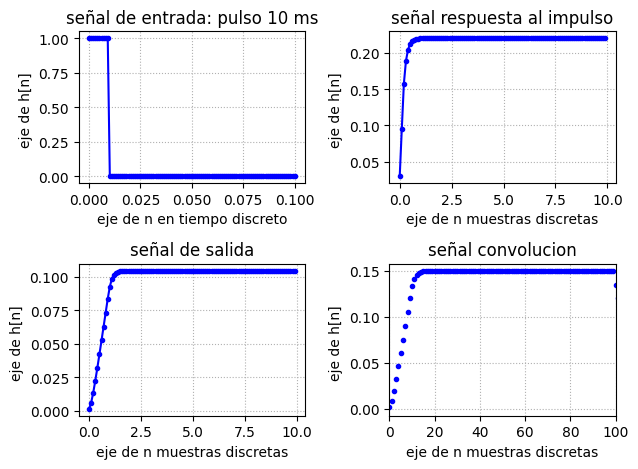

In [33]:
N=100
fs=N/10
t=np.linspace(0,1/10,N)

x=np.zeros(N,dtype=float)
for k in np.arange(0,N):
    if(t[k]<0.01):
        
        x[k]=1
    else:
        x[k]=0
        
h=np.zeros(N)
for n in np.arange(N):
    h[n]=3*(10**-2)*x[n]+5*(10**-2)*x[n-1]+3*(10**-2)*x[n-2]+1.5*h[n-1]-0.5*h[n-2]

energia=np.sum(h**2)/N 
plt.subplot(2,2,1)
plt.plot(t,x,linestyle='-',marker='.' ,color='b')
plt.title("señal de entrada: pulso 10 ms")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n en tiempo discreto')
plt.ylabel('eje de h[n] ')
plt.subplot(2,2,2)
plt.plot(np.arange(N)/fs,respuesta_impulso,linestyle='-',marker='.' ,color='b')
plt.title("señal respuesta al impulso")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')
plt.subplot(2,2,3)
plt.plot(np.arange(N)/fs,h/np.sqrt(np.sum(np.abs(h**2))),linestyle='-',marker='.' ,color='b')
plt.title("señal de salida")

plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')

plt.subplot(2,2,4)
plt.plot(np.arange(2*N-1),np.convolve(respuesta_impulso,x,mode="full")/np.sqrt(np.sum(np.abs(np.convolve(respuesta_impulso,x,mode="full")))),linestyle='',marker='.' ,color='b')
plt.title("señal convolucion")
plt.xlim(0,N)
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n] ')

plt.tight_layout() 
print("Muestras",N,"frecuencia de muestro",round(fs,2),"potencia de la señal",round(energia,2))

Text(0.5, 1.0, 'señal respuesta al impulso')

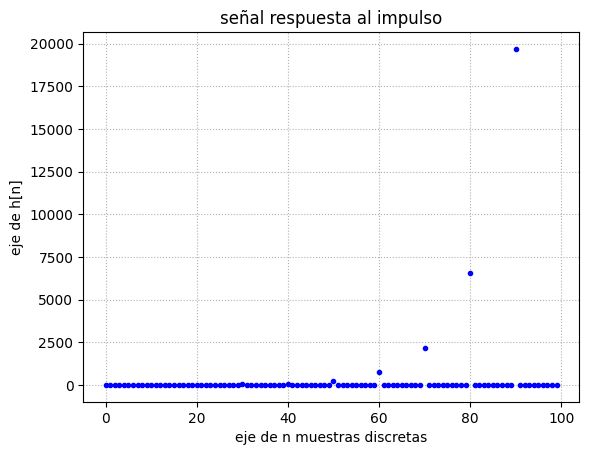

In [34]:

N=100
numero_periodos=3
fs=N*f/3

respuesta_impulso=np.zeros(N)


x=np.zeros(N)
x[0]=1

for n in np.arange(N):
    respuesta_impulso[n]=x[n]+3*respuesta_impulso[n-10]

plt.plot(np.arange(N),respuesta_impulso,linestyle='',marker='.' ,color='b')
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n]')
plt.title("señal respuesta al impulso")


la respuesta al impulso obtenido la podemos representar de la siguiente manera 
\begin{equation}
h[n]=3^n*\sum_{k=0}^{N} \delta(n-k*10)
\end{equation}
como podemos observar la respuesta al impulso se va al infinito cuando n tiende al infinito, esto sucede debido a que la ecuacion es recursiva. 

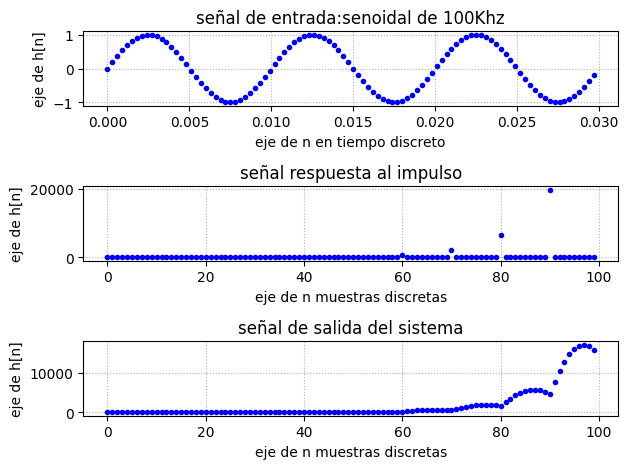

In [35]:
f=100
numero_periodos=3
fs=N*f/3

h=np.zeros(N)


t,x=funcion_sen(ff=f,nn=N,fs=fs)


for n in np.arange(N):
    h[n]=x[n]+3*h[n-10]

plt.subplot(3,1,1)
plt.plot(t,x,linestyle='',marker='.' ,color='b')
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n en tiempo discreto')
plt.ylabel('eje de h[n]')
plt.title("señal de entrada:senoidal de 100Khz")
plt.subplot(3,1,2)
plt.plot(np.arange(N),respuesta_impulso,linestyle='',marker='.' ,color='b')
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n]')
plt.title("señal respuesta al impulso")
plt.subplot(3,1,3)
plt.plot(np.arange(N),h,linestyle='',marker='.' ,color='b')
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n]')
plt.title("señal de salida del sistema")
plt.tight_layout() 

el resultado obetenio de la salida podemos asemejarlo a una suma de senos desfasados 10 muestras y modulados en amplitud de manera exponencial:
\begin{equation}
y[n]=\sum_{k=0}^{n}3^k*sen(2*\pi*100*(n-10*k))
\end{equation}

Text(0, 0.5, 'eje de h[n]')

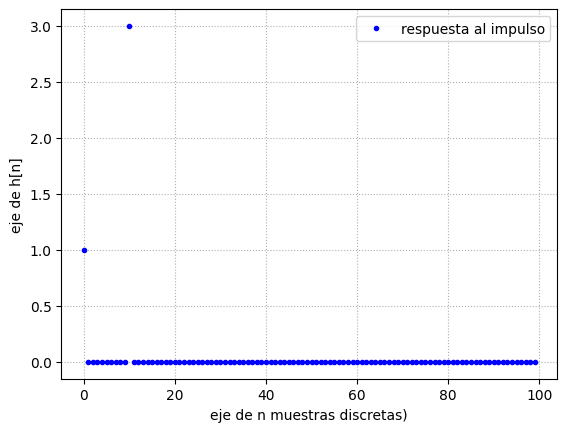

In [36]:
N=100
numero_periodos=3
fs=N*f/3

respuesta_impulso=np.zeros(N)


x=np.zeros(N)
x[0]=1

for n in np.arange(N):
    respuesta_impulso[n]=x[n]+3*x[n-10]

plt.plot(np.arange(N),respuesta_impulso, label="respuesta al impulso",linestyle='',marker='.' ,color='b')
plt.legend()
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas)')
plt.ylabel('eje de h[n]')



la respuesta al impulso se asemeja a la suma de dos funciones deltas desfasadas entre si por 10 muestra siendo una el triple del valor de la otra
\begin{equation}
h[n]= \delta[n]+3\delta[n-10]
\end{equation}

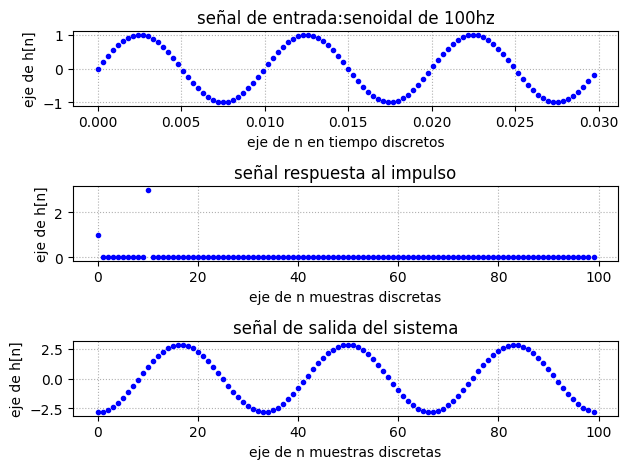

In [37]:

f=100
N=100
numero_periodos=3
fs=N*f/3

h=np.zeros(N)


t,x=funcion_sen(ff=f,nn=N,fs=fs)

respuesta_impulso=np.zeros(N)

delta=np.zeros(N)
delta[0]=1
for n in np.arange(N):
    h[n]=x[n]+3*x[n-10]
    respuesta_impulso[n]=delta[n]+3*delta[n-10]

plt.figure(1)
plt.subplot(3,1,1)
plt.plot(t,x,linestyle='',marker='.' ,color='b')
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n en tiempo discretos')
plt.ylabel('eje de h[n]')
plt.title("señal de entrada:senoidal de 100hz")
plt.subplot(3,1,2)
plt.plot(np.arange(N),respuesta_impulso,linestyle='',marker='.' ,color='b')
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n]')
plt.title("señal respuesta al impulso")
plt.subplot(3,1,3)
plt.plot(np.arange(N),h,linestyle='',marker='.' ,color='b')
plt.grid(True, linestyle=':') 
plt.xlabel('eje de n muestras discretas')
plt.ylabel('eje de h[n]')
plt.title("señal de salida del sistema")
plt.tight_layout() 

como habiamos dicho anteriormente la respuesta al impulso de la ecuacion en diferencias es una suma de funciones delta, por lo tanto si lo pasamos a terminos de la combolucion, gracias a que esta ultima operacio es distributiba, podemos obtener enetonces que la señal de salida es una suma de senos desfasados y modulados en amplitud tal que
\begin{equation}
h(x)=sen(2*\pi*100*x)+3*sen(2*\pi*100*(x-10))
\end{equation}

## conclusion
la utilizacion de ecuaciones en diferencias nis resulta util para modelar sistemas LTI. la salida del sistema va a ser igual a la convolucion entre la respuesta al impulso y la entrada pero solo de hasta las muestras validas es decir N,esto es debido a que la convolucion te devuelve valores de 0 a 2N-1 pero solo de 0 a N-1 son muestras validas.
ademas se observo que la potencia de la  respuesta al impuslso del sistema representado por  ecuciones recursivas nunca decae y sigue creciendo hasta el infinito, esto puede llegar a ser un problema en el analisis de señales ya que nunca se puede terminar de representar un sistema por completo.